In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv(r"C:\Users\Raj Aryan\Documents\Avocado\avocado.csv")

In [4]:
#top 5 rows of the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(18249, 14)

In [6]:
# Some relevant columns in the dataset:

# Date - The date of the observation

# AveragePrice - the average price of a single avocado

# type - conventional or organic

# year - the year

# Region - the city or region of the observation

# Total Volume - Total number of avocados sold

# 4046 - Total number of avocados with PLU 4046 sold  (Small Hass)
# 4225 - Total number of avocados with PLU 4225 sold  (Large Hass)
# 4770 - Total number of avocados with PLU 4770 sold  (XLarge Hass)

In [7]:
# Weekly 2018 retail scan data for National retail volume (units) and price.

# Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

# The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

# The Product Lookup codes (PLU’s) in the table are only for Hass avocados.

# Other varieties of avocados (e.g. greenskins) are not included in this table.

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
# To summarise the dataset we see;

# 14 columns (variables) and 18249 rows (observations)

# There isn't any NULL variable

# data types: float64(9), int64(2), object(3)

# there are some unnamed/undefined columns

# 'region','type' and 'date' columns are in object format

In [11]:
# Target of this project is to predict the future price of avocados depending on those variables we have; 

# * Type     *Bags(4 units) vs Bundle(one unit)     *Region      *Volume      *Size     *Years

# Data Preprocessing

In [12]:
#dropping unnamed column and renaming the columns
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df.rename(columns={'4046':"Small Hass",'4225':'Large Hass','4770':'XLarge Hass'},inplace=True)

In [13]:
#convert Date column's format
df['Date']=pd.to_datetime(df['Date'])

df.sort_values(by=['Date'],inplace=True,ascending=True)

df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


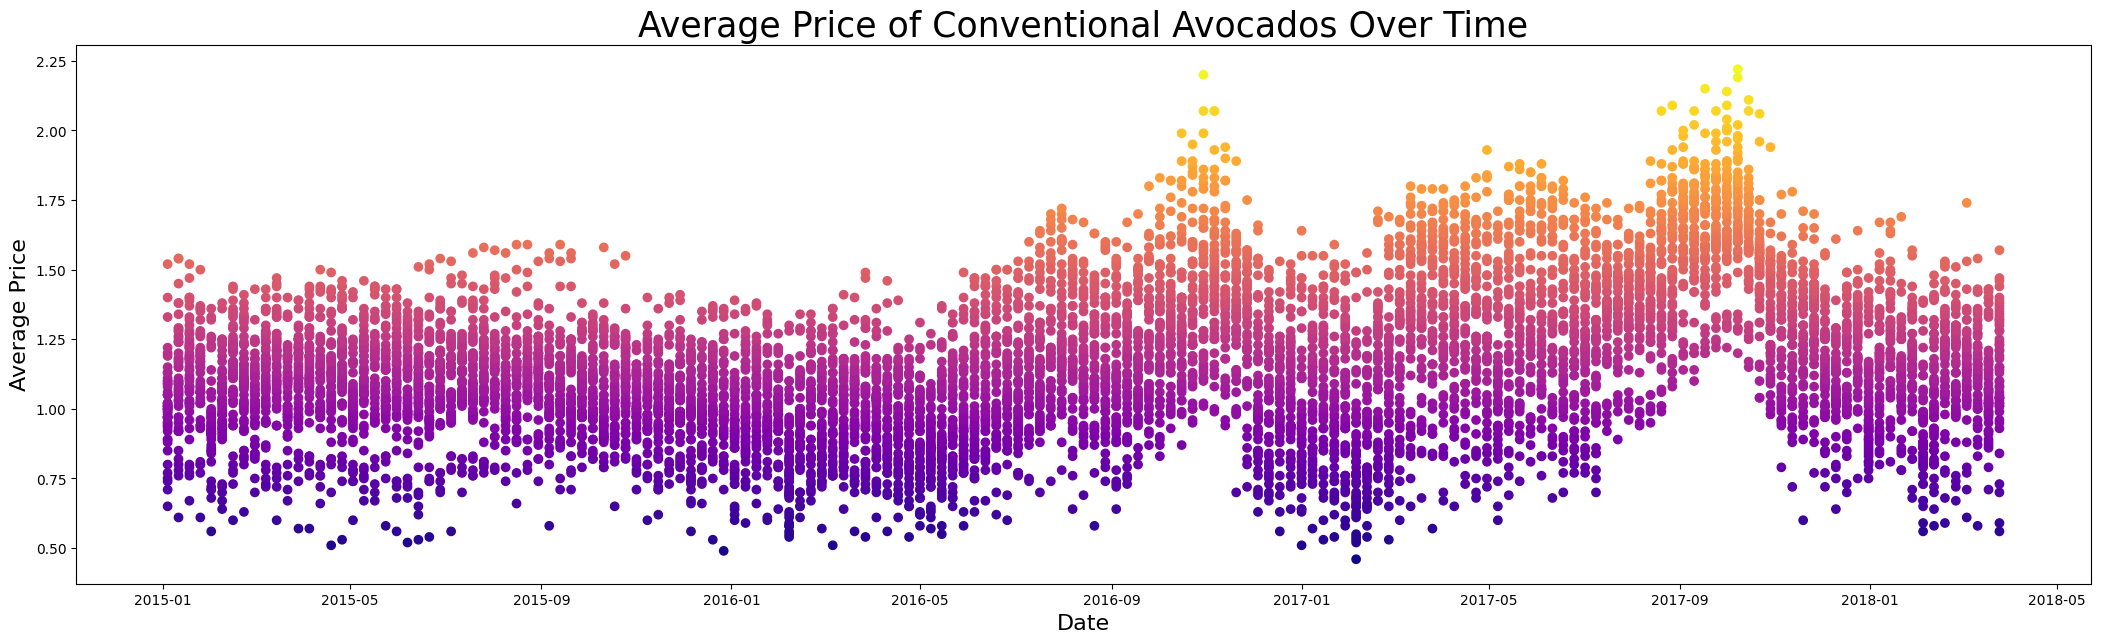

In [14]:
# Average price of Conventional Avocados over time

fig=plt.figure(figsize=(26,7))
plt.scatter(df[df['type']=='conventional']['Date'],df[df['type']=='conventional']['AveragePrice'],cmap='plasma',c=df[df['type']=='conventional']['AveragePrice'])
plt.title('Average Price of Conventional Avocados Over Time',fontsize=25)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.show()

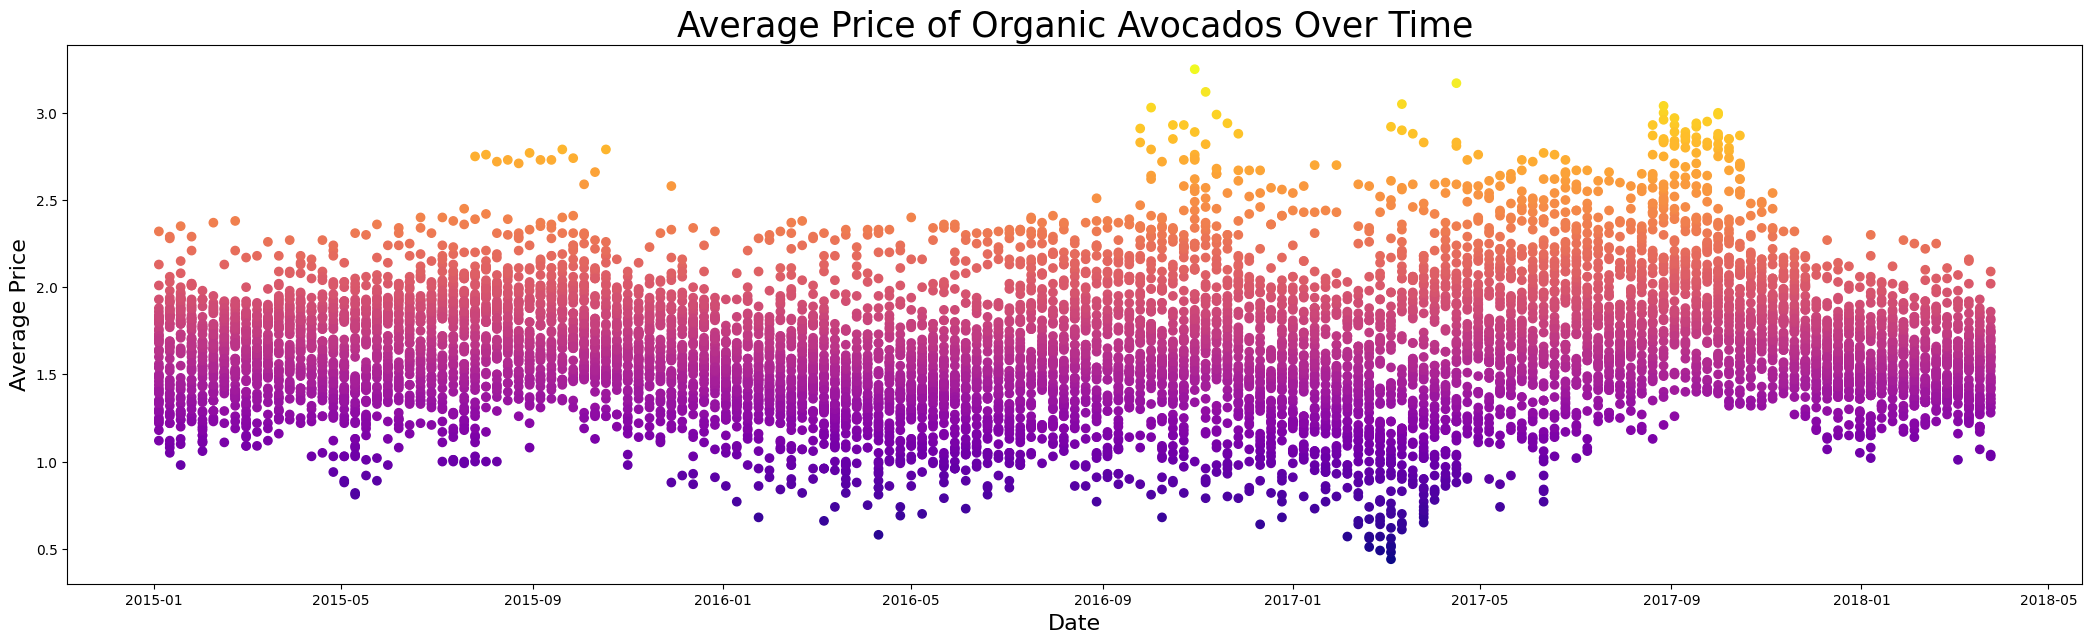

In [15]:
# Average price of Organic Avocados over time

fig=plt.figure(figsize=(26,7))
plt.scatter(df[df['type']=='organic']['Date'],df[df['type']=='organic']['AveragePrice'],cmap='plasma',c=df[df['type']=='organic']['AveragePrice'])
plt.title('Average Price of Organic Avocados Over Time',fontsize=25)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.show()

In [16]:
# Dropping the Date column (date format is not suitable for next level analysis (i.e. OHE))

df=df.drop(['Date'],axis=1)

In [17]:
# Checking if the sample is balanced

df.groupby('region').size()  # Approximately, there are 338 observations from each region, sample seems balanced

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [18]:
len(df['region'].unique())

54

In [19]:
df['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [20]:
# basically we can remove states and work on cities rather than analysing both (to prevent multicollinerarity)

regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df=df[~df['region'].isin(regionsToRemove)]
len(df['region'].unique())

43

<AxesSubplot: title={'center': 'Average Price of Avocado by Region'}, xlabel='AveragePrice', ylabel='region'>

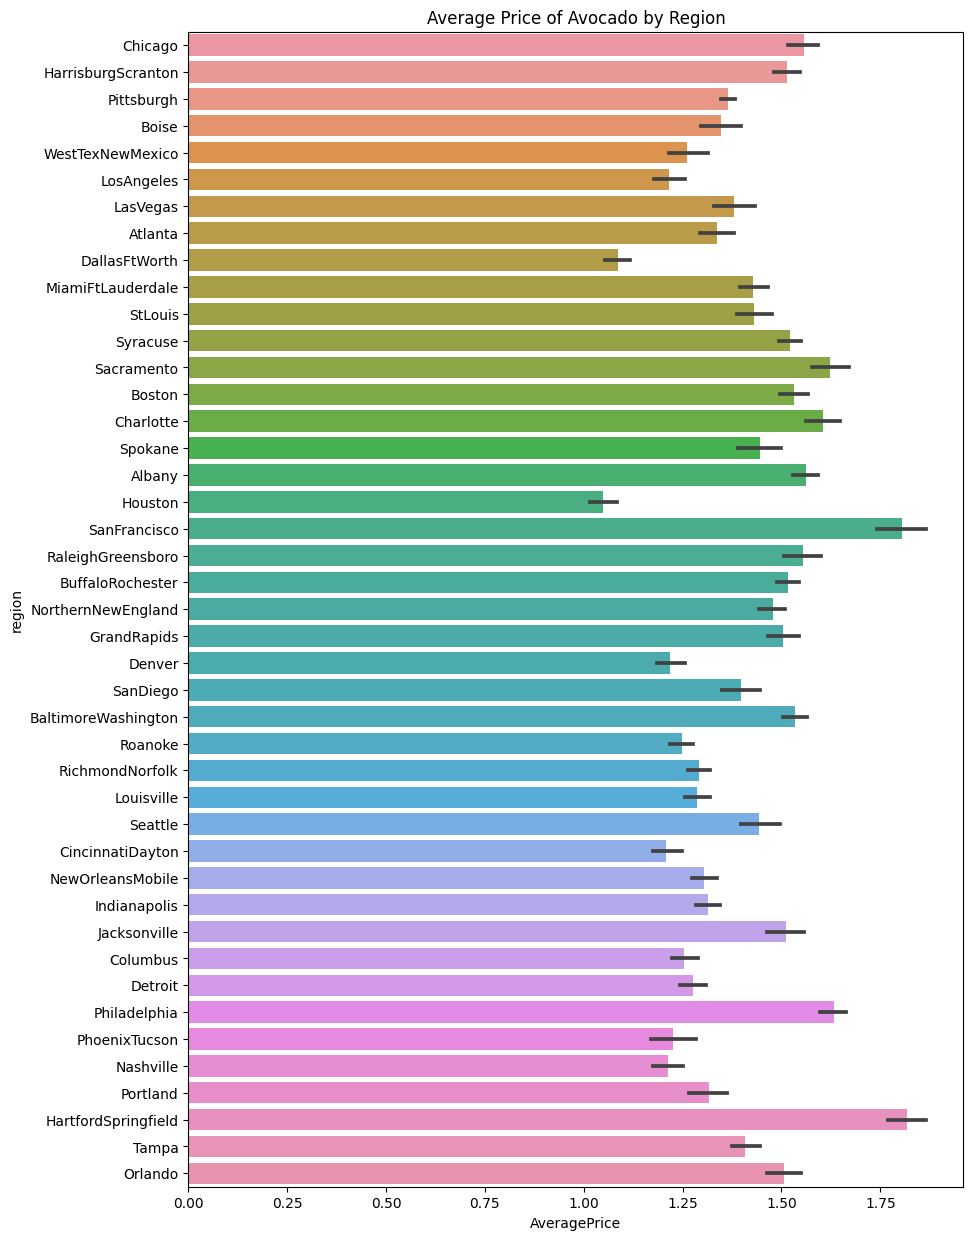

In [21]:
# The average prices by regions

plt.figure(figsize=(10,15))
plt.title("Average Price of Avocado by Region")
sns.barplot(x=df['AveragePrice'],y=df['region'])

In [22]:
type_counts=df.groupby('type').size()
type_counts

# Types of avocados are also balanced since the ratio is almost 0.5

type
conventional    7267
organic         7264
dtype: int64

<AxesSubplot: title={'center': 'Average prices of avocados by types'}, xlabel='type', ylabel='AveragePrice'>

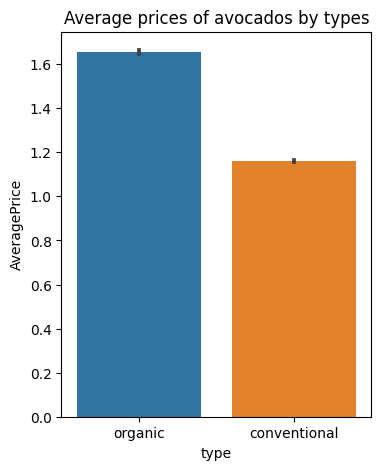

In [23]:
# The average prices of avocados by types; organic or not

plt.figure(figsize=(4,5))
plt.title("Average prices of avocados by types")
sns.barplot(x=df['type'],y=df['AveragePrice'])

In [24]:
df[['Small Bags', 'Large Bags', 'XLarge Bags','Small Hass', 'Large Hass','XLarge Hass','Total Volume','Total Bags']].corr()

,Small Bags,Large Bags,XLarge Bags,Small Hass,Large Hass,XLarge Hass,Total Volume,Total Bags
Small Bags,1.000000,0.238270,0.658700,0.653724,0.563730,0.437290,0.836906,0.956905
Large Bags,0.238270,1.000000,0.080479,0.348216,0.265454,0.121320,0.429051,0.509324
XLarge Bags,0.658700,0.080479,1.000000,0.454440,0.308823,0.492822,0.549505,0.622964
Small Hass,0.653724,0.348216,0.454440,1.000000,0.505321,0.412247,0.890380,0.684041
Large Hass,0.563730,0.265454,0.308823,0.505321,1.000000,0.580107,0.787495,0.577115
XLarge Hass,0.437290,0.121320,0.492822,0.412247,0.580107,1.000000,0.576676,0.429245
Total Volume,0.836906,0.429051,0.549505,0.890380,0.787495,0.576676,1.000000,0.869796
Total Bags,0.956905,0.509324,0.622964,0.684041,0.577115,0.429245,0.869796,1.000000


<AxesSubplot: >

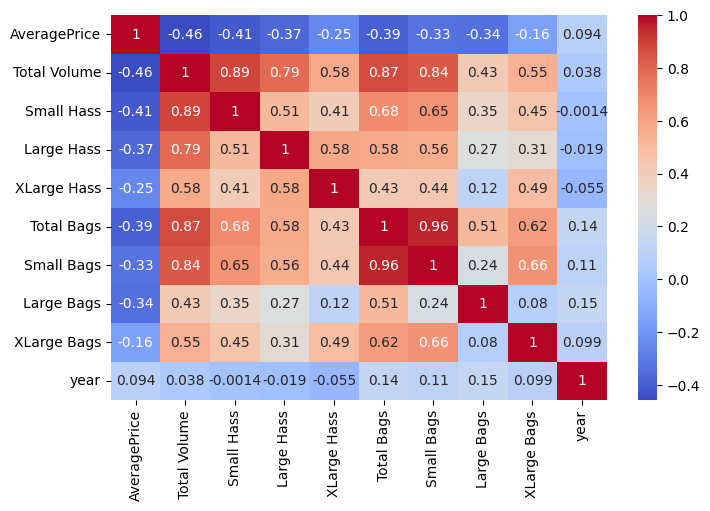

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [26]:
# There is a high correlation between those pairs: 
# small hass & total volume  (0.89)      
# total bags & total volume  (0.87)      
# small bags & total bags    (0.96)      

# Small Hass avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.
# Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.
# Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

In [27]:
df_V = df.drop(['AveragePrice', 'Total Volume', 'Total Bags'], axis = 1).groupby('year').sum()
df_V

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,3.956835e+08,3.816794e+08,34551068.97,1.424565e+08,28409959.31,1324210.40
2016,3.373537e+08,3.684409e+08,37822298.99,2.630756e+08,80734611.45,4894984.66
2017,3.667922e+08,3.405079e+08,22968983.86,2.811956e+08,93246243.70,5384099.35
2018,1.013592e+08,8.963867e+07,5804442.33,7.920550e+07,28310113.38,1589371.50


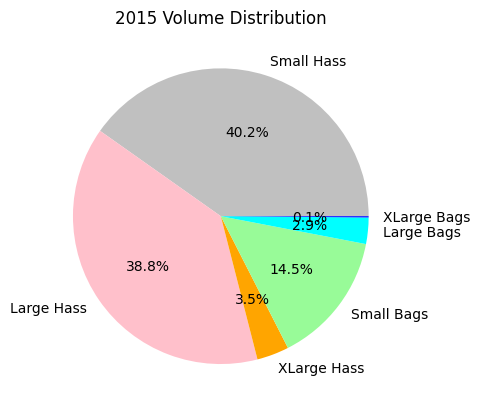

In [28]:
#pie chart for 2015 Volume Distribution
labels=['Small Hass','Large Hass','XLarge Hass','Small Bags','Large Bags','XLarge Bags']
plt.pie(df_V.loc[2015].tolist(),labels=labels,colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'],autopct='%1.1f%%')
plt.title('2015 Volume Distribution')
plt.show()

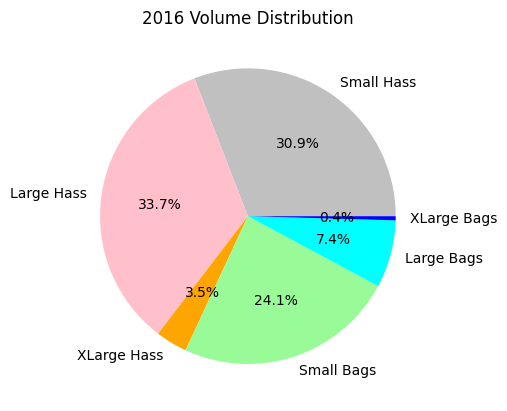

In [29]:
#pie chart for 2016 Volume Distribution
labels=['Small Hass','Large Hass','XLarge Hass','Small Bags','Large Bags','XLarge Bags']
plt.pie(df_V.loc[2016].tolist(),labels=labels,colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'],autopct='%1.1f%%')
plt.title('2016 Volume Distribution')
plt.show()

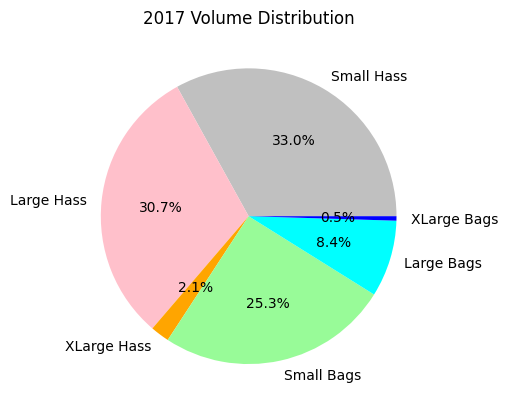

In [30]:
#pie chart for 2017 Volume Distribution
labels=['Small Hass','Large Hass','XLarge Hass','Small Bags','Large Bags','XLarge Bags']
plt.pie(df_V.loc[2017].tolist(),labels=labels,colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'],autopct='%1.1f%%')
plt.title('2017 Volume Distribution')
plt.show()

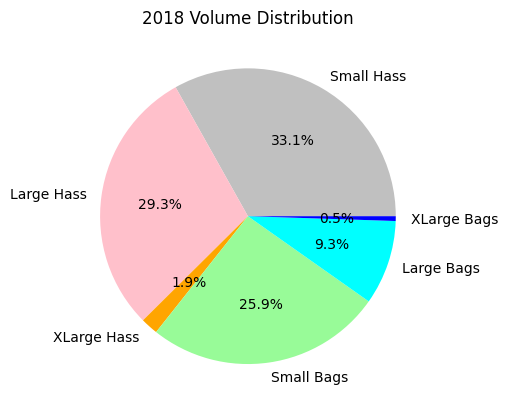

In [31]:
#pie chart for 2018 Volume Distribution
labels=['Small Hass','Large Hass','XLarge Hass','Small Bags','Large Bags','XLarge Bags']
plt.pie(df_V.loc[2018].tolist(),labels=labels,colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'],autopct='%1.1f%%')
plt.title('2018 Volume Distribution')
plt.show()

In [32]:
# Total Bags = Small Bags + Large Bags + XLarge Bags
df=df.drop(['Total Bags'],axis=1)

In [33]:
# Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags , to avoid multicollinearity I also drop Total Volume column.


df = df.drop(['Total Volume'], axis = 1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14531 entries, 9593 to 8574
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14531 non-null  float64
 1   Small Hass    14531 non-null  float64
 2   Large Hass    14531 non-null  float64
 3   XLarge Hass   14531 non-null  float64
 4   Small Bags    14531 non-null  float64
 5   Large Bags    14531 non-null  float64
 6   XLarge Bags   14531 non-null  float64
 7   type          14531 non-null  object 
 8   year          14531 non-null  int64  
 9   region        14531 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.2+ MB


In [35]:
# Standardizing (scaling) the variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(df.loc[:,'Small Hass':'XLarge Bags']) 
df.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.402608,-0.475043,-0.347233,-0.419915,-0.371357,-0.231149,organic,2015,Chicago
10009,1.68,-0.407686,-0.586724,-0.347233,-0.406763,-0.371357,-0.231149,organic,2015,HarrisburgScranton
1819,1.52,-0.393596,-0.331445,-0.269328,-0.335946,-0.285739,-0.231149,conventional,2015,Pittsburgh
9333,1.64,-0.408479,-0.580043,-0.347233,-0.425742,-0.366967,-0.231149,organic,2015,Boise
2807,0.75,1.700946,0.483289,0.414395,0.911829,-0.305594,-0.231149,conventional,2015,WestTexNewMexico


In [36]:
df.round(3).head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231,organic,2015,Chicago
10009,1.68,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231,organic,2015,HarrisburgScranton
1819,1.52,-0.394,-0.331,-0.269,-0.336,-0.286,-0.231,conventional,2015,Pittsburgh
9333,1.64,-0.408,-0.580,-0.347,-0.426,-0.367,-0.231,organic,2015,Boise
2807,0.75,1.701,0.483,0.414,0.912,-0.306,-0.231,conventional,2015,WestTexNewMexico


In [37]:
# Specifying dependent and independent variables

X=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']
y=np.log1p(y)

In [38]:
# Labeling the categorical variables

Xcat=pd.get_dummies(X[['type','region']],drop_first=True)

In [39]:
Xnum=X[["Small Hass","Large Hass","XLarge Hass","Small Bags","Large Bags","XLarge Bags"]]

In [40]:
# Concatenate dummy categorcal variables and numeric variables
X=pd.concat([Xcat,Xnum],axis=1)
X.shape

(14531, 49)

In [41]:
F_DF=pd.concat([y,X],axis=1)
F_DF.head(3)

,AveragePrice,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
9593,0.912283,1,0,0,0,0,0,0,1,0,...,0,0,0,0,-0.402608,-0.475043,-0.347233,-0.419915,-0.371357,-0.231149
10009,0.985817,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.407686,-0.586724,-0.347233,-0.406763,-0.371357,-0.231149
1819,0.924259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.393596,-0.331445,-0.269328,-0.335946,-0.285739,-0.231149


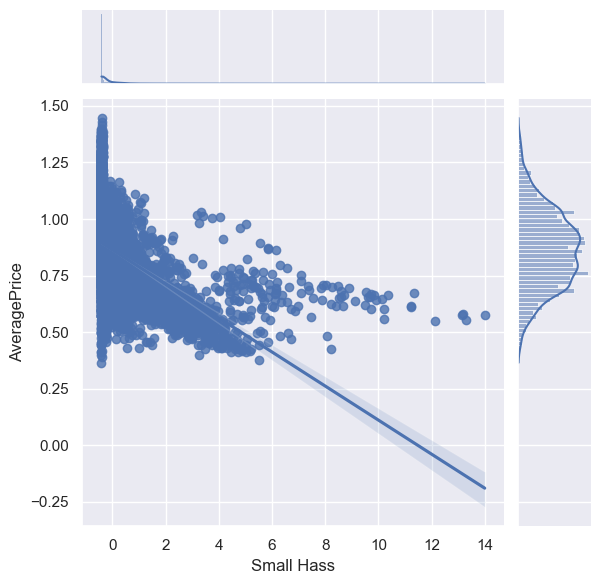

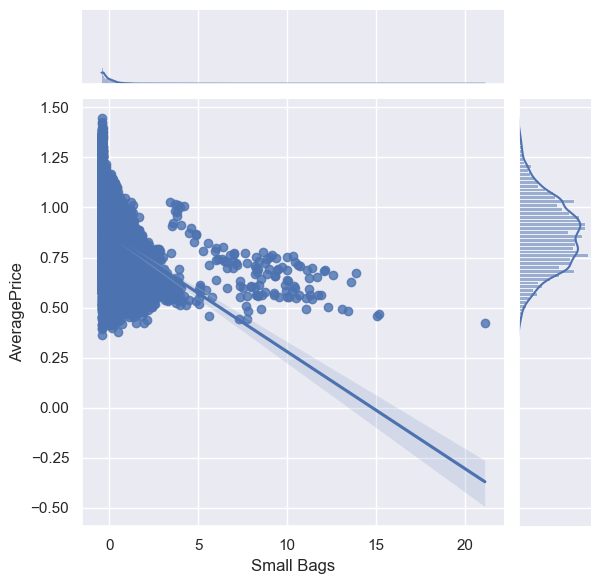

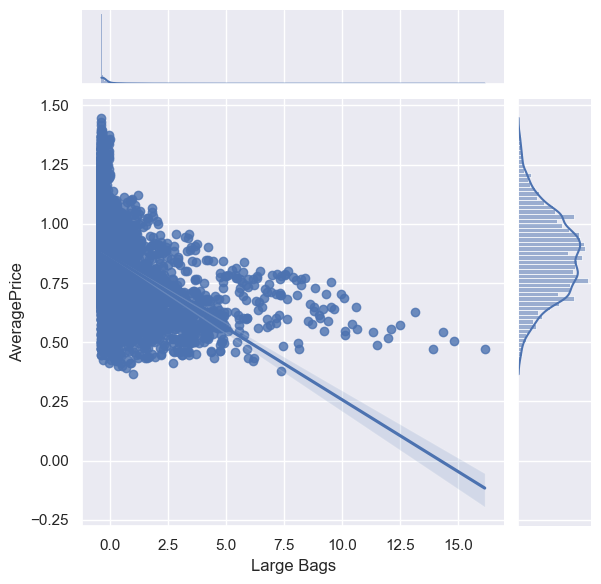

In [42]:
# Just before the regression analysis, I want to visualise the highly correlated Variables with the Average Prices;

sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="AveragePrice", data=F_DF, kind="reg")
sns.jointplot(x="Small Bags", y="AveragePrice", data=F_DF, kind="reg")
sns.jointplot(x="Large Bags", y="AveragePrice", data=F_DF, kind="reg")

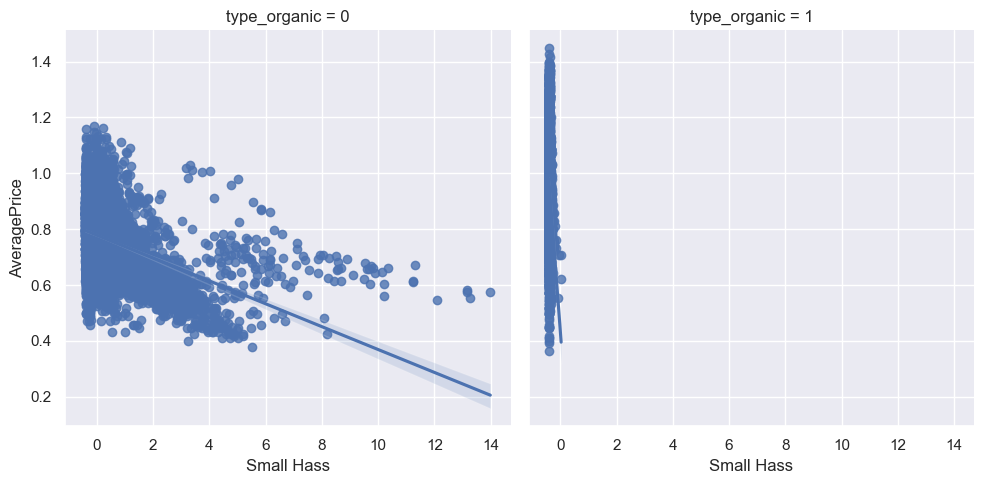

In [43]:
sns.lmplot(x="Small Hass", y="AveragePrice", col="type_organic", data=F_DF, col_wrap=2)

# Graphs depict that organic avocados have less elasticity to the price, compared to conventional ones.

In [44]:
# TRAIN and TEST SPLIT

# Since the data is a time series data (gives weekly avocado prices between Jan 2015 and Apr 2018)
# I sort it by Date and then split it due to date manually (not randomly), to preserve the 'times series effect' on it.
# I determined the split ratio as 0.30, so train and test data are just as follows;


X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

In [45]:
#implementing Machine Learning Models

In [46]:
#Multiple Linear Regression

from sklearn.linear_model import LinearRegression
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

print("R2 of Linear Regression:",LinReg.score(X_train,y_train))

R2 of Linear Regression: 0.6456215316684979


In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
print('MAE: ',mean_absolute_error(y_test,LinReg.predict(X_test)))
print('MSE: ',mean_squared_error(y_test,LinReg.predict(X_test)))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,LinReg.predict(X_test))))

MAE:  0.11297102534788976
MSE:  0.020701387918018066
RMSE:  0.14387976896707216


Text(0.5, 1.0, 'Distribution of Residuals')

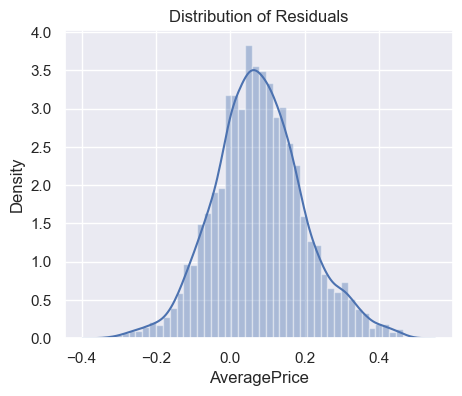

In [49]:
# Creating a Histogram of Residuals

plt.figure(figsize=(5,4))
sns.distplot(y_test-LinReg.predict(X_test))
plt.title('Distribution of Residuals')

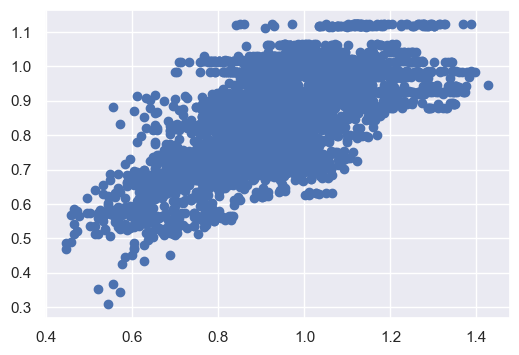

In [50]:
#Scatter plot of y_test and y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_test,LinReg.predict(X_test))

In [51]:
# we can confirm the R2 value (moreover, get the R2 Adj.value) of the model by statsmodels library of python

import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     376.3
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:59:54   Log-Likelihood:                 9124.8
No. Observations:               10172   AIC:                        -1.815e+04
Df Residuals:                   10122   BIC:                        -1.779e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

In [53]:
# KNN Regressor

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [55]:
from sklearn.metrics import mean_squared_error
mse=sqrt(mean_squared_error(y_test,knn.predict(X_test)))
print('RSME of KNN model is: ',mse)

RSME of KNN model is:  0.14178100684761086


In [56]:
print('R2 of KNN model is: ',knn.score(X_train,y_train))

R2 of KNN model is:  0.9274204661840991


In [57]:
# SVR Regressor

# First, let's choose which kernel is the best for our data

from sklearn.svm import SVR

for k in ['linear','poly','rbf','sigmoid']:
    clf=SVR(kernel=k)
    clf.fit(X_train,y_train)
    confidence=clf.score(X_train,y_train)
    print(k,confidence)

linear 0.6420198879128107
poly 0.7666695753740883
rbf 0.7948267556500263
sigmoid -912617.2153032972


In [58]:
Svr=SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

# Intuitively, the gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
# The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
# For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
# A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
# In other words C behaves as a regularization parameter in the SVM.

Svr.fit(X_train,y_train)
print(Svr.score(X_train,y_train))

0.8208087046642905


In [59]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Svr.predict(X_test))
rsme=sqrt(mean_squared_error(y_test,Svr.predict(X_test)))
print("MSE calculated is: ",mse)
print("RSME calculated is: ",rsme)

MSE calculated is:  0.018350819614745394
RSME calculated is:  0.13546519706088864


In [60]:
Svr.predict(X_test)[0:5]

array([0.68179698, 0.84145673, 0.89931862, 0.99810732, 1.15107343])

In [61]:
#Decision Tree Regressor

In [62]:
# Determining the best depth
from sklearn.tree import DecisionTreeRegressor

minDepth = 100
minRMSE = 100000


for depth in range(2,10):
    tree_reg = DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("Depth:",depth,", MSE:", mse)
    print("Depth:",depth, ",RMSE:", rmse)
  
    if rmse < minRMSE:
        minRMSE = rmse
        minDepth = depth
    
      
print("MinDepth:", minDepth)
print("MinRMSE:", minRMSE)

Depth: 2 , MSE: 0.023931594538363448
Depth: 2 ,RMSE: 0.15469839862895624
Depth: 3 , MSE: 0.025058431066303136
Depth: 3 ,RMSE: 0.1582985504238846
Depth: 4 , MSE: 0.026143874511720042
Depth: 4 ,RMSE: 0.16169067540127366
Depth: 5 , MSE: 0.02602997597058147
Depth: 5 ,RMSE: 0.161338079728815
Depth: 6 , MSE: 0.025398801864938175
Depth: 6 ,RMSE: 0.15937001557676456
Depth: 7 , MSE: 0.02545431223493405
Depth: 7 ,RMSE: 0.15954407615118166
Depth: 8 , MSE: 0.02454167812027109
Depth: 8 ,RMSE: 0.15665783772371905
Depth: 9 , MSE: 0.024256016363524525
Depth: 9 ,RMSE: 0.15574343120505765
MinDepth: 2
MinRMSE: 0.15469839862895624


In [63]:
DTree=DecisionTreeRegressor(max_depth=minDepth)
DTree.fit(X_train,y_train)
print(DTree.score(X_train,y_train))  

0.5532570096878549


In [64]:
from sklearn.metrics import mean_absolute_error
print('MAE:',mean_absolute_error(y_test, DTree.predict(X_test)))
print('MSE:',mean_squared_error(y_test, DTree.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, DTree.predict(X_test))))

MAE: 0.12232154747783539
MSE: 0.02393159453836357
RMSE: 0.15469839862895662


In [65]:
#RandomForest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)
print(RForest.score(X_train,y_train))  

0.9846648197303784


In [68]:
from sklearn.metrics import mean_absolute_error

print('MAE:',mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:',mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.11377431590687781
MSE: 0.021599511343695716
RMSE: 0.14696772211508116


In [69]:
# CONCLUSION 

# Comparing The RMSE Values Of The Models

In [71]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regr : ',round(np.sqrt(mean_squared_error(y_test, LinReg.predict(X_test))),4))

# KNN RMSE               : 
print('RMSE value of the KNN Model   : ',round(np.sqrt(mean_squared_error(y_test, knn.predict(X_test))),4))

# SVR RMSE               : 
print('RMSE value of the SVR Model   : ',round(np.sqrt(mean_squared_error(y_test, Svr.predict(X_test))),4))

# Decision Tree RMSE     : 
print('RMSE value of the Decis Tree  : ',round(np.sqrt(mean_squared_error(y_test, DTree.predict(X_test))),4))

# Random Forest RMSE     : 
print('RMSE value of the Rnd Forest  : ',round(np.sqrt(mean_squared_error(y_test, RForest.predict(X_test))),4))



RMSE value of the Linear Regr :  0.1439
RMSE value of the KNN Model   :  0.1418
RMSE value of the SVR Model   :  0.1355
RMSE value of the Decis Tree  :  0.1547
RMSE value of the Rnd Forest  :  0.147
